# 유동인구 데이터 전처리

In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import rc

In [24]:
# 데이터 로드
df = pd.read_csv("../../data/유동인구_자치구.csv")

In [25]:
df.head()

,기준_년분기_코드,자치구_코드,자치구_코드_명,총_유동인구_수,남성_유동인구_수,여성_유동인구_수,연령대_10_유동인구_수,연령대_20_유동인구_수,연령대_30_유동인구_수,연령대_40_유동인구_수,...,시간대_14_17_유동인구_수,시간대_17_21_유동인구_수,시간대_21_24_유동인구_수,월요일_유동인구_수,화요일_유동인구_수,수요일_유동인구_수,목요일_유동인구_수,금요일_유동인구_수,토요일_유동인구_수,일요일_유동인구_수
0,20252,11410,서대문구,94374778.0,42521109.0,51853671.0,12981208.0,18487059.0,15485328.0,15707932.0,...,12061407.0,15321202.0,11624801.0,13699023.0,13812446.0,13964678.0,13914272.0,13683860.0,12721369.0,12579129.0
1,20252,11440,마포구,112137071.0,50618770.0,61518303.0,15988371.0,22737496.0,21456522.0,19309418.0,...,14406839.0,19780332.0,14162555.0,15855169.0,15934311.0,15988896.0,16011169.0,16144418.0,16272832.0,15930276.0
2,20252,11200,성동구,72624910.0,34136411.0,38488499.0,9683179.0,13126552.0,13379885.0,11958499.0,...,9264310.0,12342982.0,8967161.0,10377941.0,10439560.0,10522783.0,10492516.0,10501521.0,10192377.0,10098212.0
3,20252,11305,강북구,89655067.0,41073790.0,48581277.0,12383304.0,12855417.0,11509776.0,13476753.0,...,10101840.0,14662917.0,11914031.0,12714122.0,12722627.0,12581936.0,12613776.0,12668895.0,13083513.0,13270198.0
4,20252,11710,송파구,116916192.0,54468265.0,62447925.0,19901964.0,14889045.0,20261367.0,19982379.0,...,13605908.0,19506448.0,15278271.0,16561650.0,16633057.0,16581753.0,16622288.0,16725361.0,16911162.0,16880921.0


In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 650 entries, 0 to 649
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   기준_년분기_코드         650 non-null    int64  
 1   자치구_코드            650 non-null    int64  
 2   자치구_코드_명          650 non-null    object 
 3   총_유동인구_수          650 non-null    float64
 4   남성_유동인구_수         650 non-null    float64
 5   여성_유동인구_수         650 non-null    float64
 6   연령대_10_유동인구_수     650 non-null    float64
 7   연령대_20_유동인구_수     650 non-null    float64
 8   연령대_30_유동인구_수     650 non-null    float64
 9   연령대_40_유동인구_수     650 non-null    float64
 10  연령대_50_유동인구_수     650 non-null    float64
 11  연령대_60_이상_유동인구_수  650 non-null    float64
 12  시간대_00_06_유동인구_수  650 non-null    float64
 13  시간대_06_11_유동인구_수  650 non-null    float64
 14  시간대_11_14_유동인구_수  650 non-null    float64
 15  시간대_14_17_유동인구_수  650 non-null    float64
 16  시간대_17_21_유동인구_수  650 non-null    float64
 1

In [27]:
df.describe()

,기준_년분기_코드,자치구_코드,총_유동인구_수,남성_유동인구_수,여성_유동인구_수,연령대_10_유동인구_수,연령대_20_유동인구_수,연령대_30_유동인구_수,연령대_40_유동인구_수,연령대_50_유동인구_수,...,시간대_14_17_유동인구_수,시간대_17_21_유동인구_수,시간대_21_24_유동인구_수,월요일_유동인구_수,화요일_유동인구_수,수요일_유동인구_수,목요일_유동인구_수,금요일_유동인구_수,토요일_유동인구_수,일요일_유동인구_수
count,650.000000,650.000000,6.500000e+02,6.500000e+02,6.500000e+02,6.500000e+02,6.500000e+02,6.500000e+02,6.500000e+02,6.500000e+02,...,6.500000e+02,6.500000e+02,6.500000e+02,6.500000e+02,6.500000e+02,6.500000e+02,6.500000e+02,6.500000e+02,6.500000e+02,6.500000e+02
mean,20220.115385,11416.600000,9.534529e+07,4.496413e+07,5.038116e+07,1.404500e+07,1.514714e+07,1.582593e+07,1.541056e+07,1.392681e+07,...,1.155321e+07,1.580471e+07,1.215131e+07,1.365231e+07,1.367989e+07,1.369552e+07,1.367628e+07,1.364153e+07,1.349740e+07,1.350235e+07
std,18.789088,186.485772,2.460530e+07,1.160966e+07,1.312016e+07,4.753402e+06,5.528200e+06,5.130707e+06,4.359469e+06,3.106776e+06,...,3.273222e+06,4.170186e+06,3.278294e+06,3.526587e+06,3.554086e+06,3.555594e+06,3.553509e+06,3.540068e+06,3.534098e+06,3.593645e+06
min,20191.000000,11110.000000,3.520560e+07,1.743224e+07,1.776999e+07,3.999559e+06,5.033680e+06,6.410356e+06,5.678409e+06,5.739206e+06,...,3.963352e+06,5.645011e+06,4.670233e+06,5.038425e+06,5.034937e+06,5.020337e+06,5.010227e+06,4.988063e+06,4.990545e+06,5.111435e+06
25%,20203.000000,11260.000000,7.800667e+07,3.730604e+07,4.084164e+07,1.126519e+07,1.211729e+07,1.242430e+07,1.250372e+07,1.149873e+07,...,9.536680e+06,1.295921e+07,1.032221e+07,1.115349e+07,1.117503e+07,1.117818e+07,1.117497e+07,1.113621e+07,1.117737e+07,1.142340e+07
50%,20221.500000,11410.000000,9.746241e+07,4.521293e+07,5.207122e+07,1.397143e+07,1.390212e+07,1.515945e+07,1.519283e+07,1.471528e+07,...,1.130079e+07,1.606064e+07,1.268598e+07,1.398530e+07,1.398675e+07,1.397443e+07,1.396698e+07,1.392754e+07,1.396884e+07,1.417974e+07
75%,20234.000000,11560.000000,1.119931e+08,5.277833e+07,5.901714e+07,1.704848e+07,1.763185e+07,1.824372e+07,1.845029e+07,1.636409e+07,...,1.353564e+07,1.827992e+07,1.437724e+07,1.589702e+07,1.592120e+07,1.597780e+07,1.594099e+07,1.588292e+07,1.604045e+07,1.613916e+07
max,20252.000000,11740.000000,1.499582e+08,7.255186e+07,7.772547e+07,2.471359e+07,3.272556e+07,3.175417e+07,2.960050e+07,1.972498e+07,...,2.261137e+07,2.683756e+07,1.897562e+07,2.249406e+07,2.306956e+07,2.266875e+07,2.294301e+07,2.275616e+07,2.083939e+07,2.119939e+07


In [28]:
# 불필요한 컬럼 제거
df = df.drop(columns=['자치구_코드'])

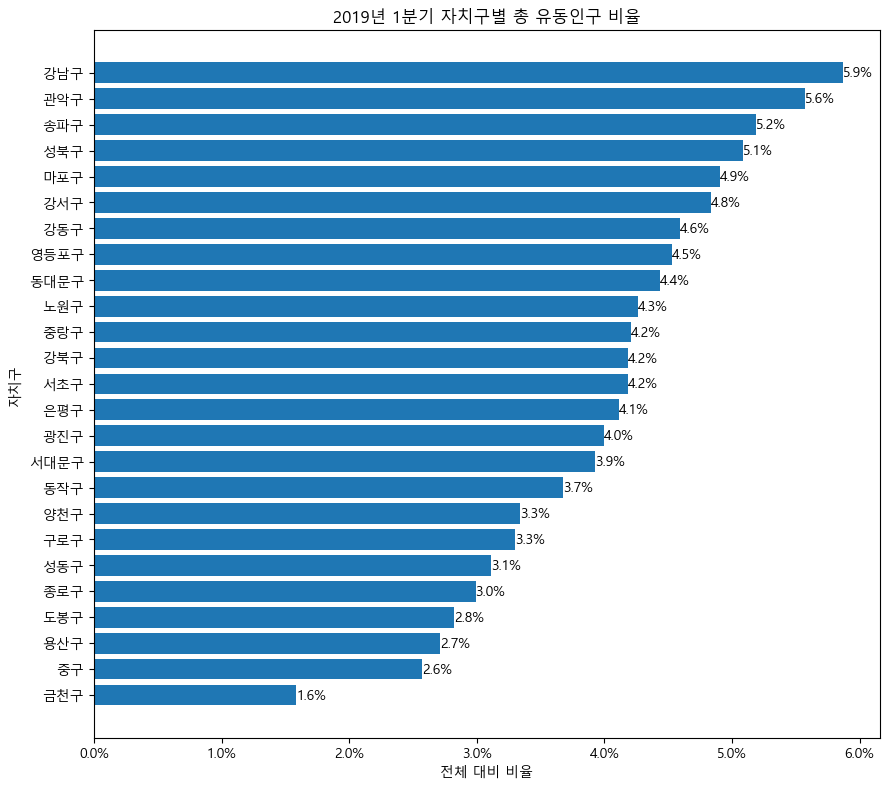

In [ ]:
# 2019년 1분기(20191) 자치구별 총 유동인구 비율 - 가로 막대 그래프
# 노트북 내 기존 스타일을 존중해 df 사용 / 경로는 floating_population.ipynb의 로드 방식에 맞춤

import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
from matplotlib import font_manager, rcParams

# 0) df가 없으면 자동 로드 (노트북 내에서 이미 df가 있다면 이 블록은 건너뜀)
if "df" not in globals():
    df = pd.read_csv("../../data/유동인구_자치구.csv", encoding="utf-8-sig")

# 1) 2019년 1분기 필터
df_2019q1 = df[df["기준_년분기_코드"] == 20191].copy()

# 2) 자치구별 총 유동인구 합산 → 전체 대비 비율 계산
group = (
    df_2019q1.groupby("자치구_코드_명", as_index=False)["총_유동인구_수"]
    .sum()
    .rename(columns={"총_유동인구_수": "fp_total"})
)
total_sum = group["fp_total"].sum()
group["fp_share"] = group["fp_total"] / total_sum

# 3) 큰 값이 위로 오도록 정렬 (barh는 리스트 첫 항목이 아래쪽에 그려지므로, 오름차순으로 두고 barh 사용)
group = group.sort_values("fp_share", ascending=True).reset_index(drop=True)

# 4) 한글 폰트(환경에 있는 것 중 하나 적용 시도)
preferred_fonts = ["Malgun Gothic", "Apple SD Gothic Neo", "Noto Sans CJK KR", "Noto Sans KR", "NanumGothic", "Nanum Gothic", "Arial Unicode MS", "DejaVu Sans"]
available = {f.name for f in font_manager.fontManager.ttflist}
for f in preferred_fonts:
    if f in available:
        rcParams["font.family"] = f
        break
rcParams["axes.unicode_minus"] = False

# 5) 플롯 (matplotlib 단일 플롯, 색상 지정 없이)
fig, ax = plt.subplots(figsize=(9, 8))
ax.barh(group["자치구_코드_명"], group["fp_share"])

# x축을 %로 표기
ax.xaxis.set_major_formatter(FuncFormatter(lambda x, pos: f"{x*100:.1f}%"))
ax.set_xlabel("전체 대비 비율")
ax.set_ylabel("자치구")
ax.set_title("2019년 1분기 자치구별 총 유동인구 비율")

# 막대 끝에 퍼센트 라벨
for i, v in enumerate(group["fp_share"].tolist()):
    ax.text(v, i, f"{v*100:.1f}%", va="center", ha="left")

plt.tight_layout()
plt.show()

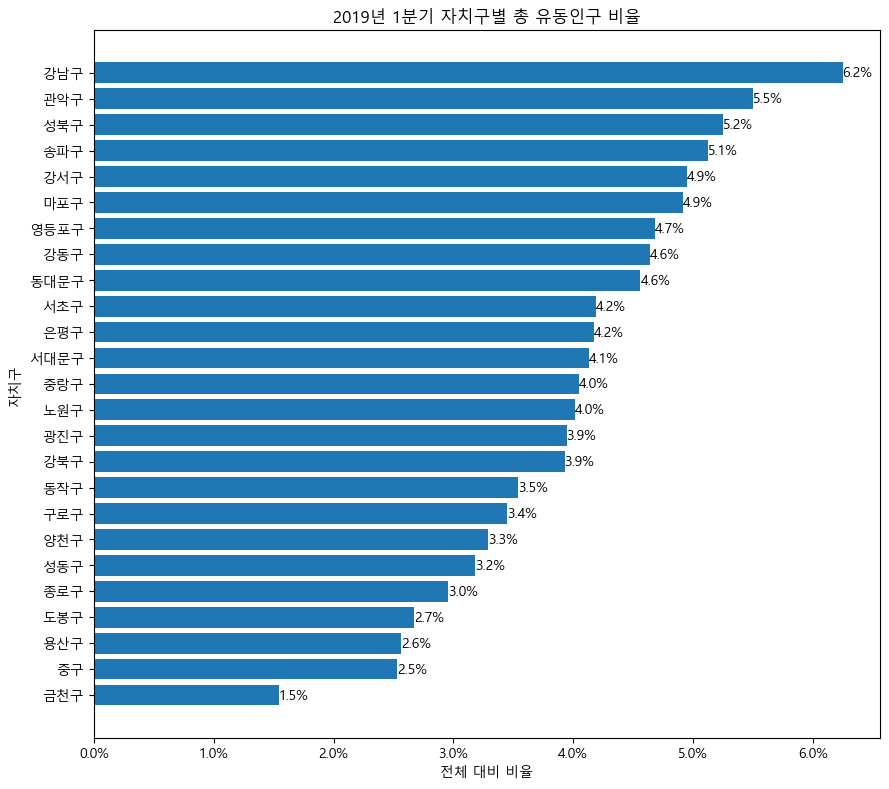

In [31]:
# 2019년 1분기(20191) 자치구별 총 유동인구 비율 - 가로 막대 그래프
# 노트북 내 기존 스타일을 존중해 df 사용 / 경로는 floating_population.ipynb의 로드 방식에 맞춤

import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
from matplotlib import font_manager, rcParams

# 0) df가 없으면 자동 로드 (노트북 내에서 이미 df가 있다면 이 블록은 건너뜀)
if "df" not in globals():
    df = pd.read_csv("../../data/유동인구_자치구.csv", encoding="utf-8-sig")

# 1) 2019년 1분기 필터
df_2019q1 = df[df["기준_년분기_코드"] == 20252].copy()

# 2) 자치구별 총 유동인구 합산 → 전체 대비 비율 계산
group = (
    df_2019q1.groupby("자치구_코드_명", as_index=False)["총_유동인구_수"]
    .sum()
    .rename(columns={"총_유동인구_수": "fp_total"})
)
total_sum = group["fp_total"].sum()
group["fp_share"] = group["fp_total"] / total_sum

# 3) 큰 값이 위로 오도록 정렬 (barh는 리스트 첫 항목이 아래쪽에 그려지므로, 오름차순으로 두고 barh 사용)
group = group.sort_values("fp_share", ascending=True).reset_index(drop=True)

# 4) 한글 폰트(환경에 있는 것 중 하나 적용 시도)
preferred_fonts = ["Malgun Gothic", "Apple SD Gothic Neo", "Noto Sans CJK KR", "Noto Sans KR", "NanumGothic", "Nanum Gothic", "Arial Unicode MS", "DejaVu Sans"]
available = {f.name for f in font_manager.fontManager.ttflist}
for f in preferred_fonts:
    if f in available:
        rcParams["font.family"] = f
        break
rcParams["axes.unicode_minus"] = False

# 5) 플롯 (matplotlib 단일 플롯, 색상 지정 없이)
fig, ax = plt.subplots(figsize=(9, 8))
ax.barh(group["자치구_코드_명"], group["fp_share"])

# x축을 %로 표기
ax.xaxis.set_major_formatter(FuncFormatter(lambda x, pos: f"{x*100:.1f}%"))
ax.set_xlabel("전체 대비 비율")
ax.set_ylabel("자치구")
ax.set_title("2019년 1분기 자치구별 총 유동인구 비율")

# 막대 끝에 퍼센트 라벨
for i, v in enumerate(group["fp_share"].tolist()):
    ax.text(v, i, f"{v*100:.1f}%", va="center", ha="left")

plt.tight_layout()
plt.show()

In [30]:
# 불필요한 컬럼 제거한 데이터 저장